In [1]:
# Thesis Topic
# Create a Decision Support System (DSS) which will support datasets regarding breast cancer.

# implement a model that will preprocess data (from two existing datasets)
# without making use of the third-party Weka software.

# All required to be done, is import all necessary modules, required for the system designed.
# To begin with, the built-in CSV module will be imported.

import csv

# Then the "rest" of the modules required, are imported (and explained) one-by-one.
# The numpy module may be useful for experiments with the scikit-learn module,
# which will be imported later on.

import numpy as np

# Another "useful" package (in case of emergency) ought to be the math package
# just as the CSV module, it is built-in in Python.

import math

# And then, the pandas module will be imported.
# The pandas module will be of need for the Decision Support System designed and implemented,
# as well as the CSV datasets the program will fetch to be read.

import pandas as pd

# Most experiments, will base on machine learning and data science.
# The scikit-learn module will be called and imported using the "sklearn" abbreviation
# and by importing it, all features will be granted access.

import sklearn

# The "random" package is imported.
# Occasionally, some sequences may feature random numbers and/or time.
# Therefore, it is considered useful.

import random

# For more complicated algorithms, classifiers and distributions, the "scipy" package might be of need;
# therefore, it will be imported, and there will be high chance of use in the model.

# the scipy package will be imported with all its features.

import scipy

# Lastly, for the plot part of the model,
# the "pyplot" and "seaborn" packages are imported.
# Both may consider useful for the model, because later they may be used to generate and display figures.

# First, importing the "pyplot" package for basic plots and histograms.

import matplotlib.pyplot as plt

# For advanced plotting and heatmaps, it is useful to import the "seaborn" package.

import seaborn as sns

In [2]:
# Since the scikit-learn package has been imported (see above, on the first cell)
# some extra features, coming from this package, will optionally be imported, 
# in order for them to be used, and will be used in the current model.

# For instance, the train and test split, will be used, 
# as long as each dataset will be trained and tested.

from sklearn.model_selection import train_test_split

# Same thing with cross-validation models and metrics.
# Such as the K-Fold Cross Validation process, which will be used later on the model,

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# import recursive feature elimination algorithm
# it will be imported before the rest of the modules used
# and will take place before classifiers
# inside every loop

from sklearn.feature_selection import RFECV

# and one for K-Fold process
# in this case, a Stratified K-Fold method will be used.

from sklearn.model_selection import StratifiedKFold

# feature selection techniques,
# as well as classification techniques, 
# used for later contributions to the model

from sklearn import tree
from sklearn import svm

# additional module for the decision tree classifier
# (in case it is done separately)

from sklearn.tree import DecisionTreeClassifier

# import the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# import the ADABoost Classifier

from sklearn.ensemble import AdaBoostClassifier

# import the K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

# import the Naïve-Bayes classifier

import sklearn.naive_bayes

# (optionally, each type - "just in case")

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB

# will be added

# as well as extras such as matrices

import sklearn.metrics

# the command above, will import necessary metrics on the model
# optionally, the confusion matrix metric will be imported (to avoid errors)
# and so the same with classification report metric

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# will be added

# Lastly, the XGBoost classifier will be imported, due to data classification
# in later contributions to the model.

import xgboost as xgb

# import the label encoder module, which will be used during the XGBoost classification

from sklearn.preprocessing import LabelEncoder

In [61]:
# For the model save process, it is important to use a library which will execute tasks
# in a parallel using pipelines (pipelining)
# rather than executing them sequentially one after another

# In this case it is best joblib library is used.

import joblib

# also import 'pickle' module

import pickle

# also import 'os' module
# in case the model is saved to a directory
# (and to avoid errors)

import os

In [3]:
# After importing all features and extras, the program will read and fetch the datasets,
# required for the experimental model in progress.

# In this part, the read() module from the pandas package will be used, under "pd.read()"
# An attempt for reading the first dataset (data.csv) will be made.
# In the below line of code, the data.csv file will be stored into a dataframe, using a method from the pandas package.

# The dataframe for the first dataset, will be named into df_d1.
# It will be used for the first dataset.

# For the first dataframe, the file used to be fetched and read, was slightly altered
# the "ID" column was removed from the file, so that the prompt used later, 
# will not read the patients' ID number.

df_d1 = pd.read_csv('C:\\Users\\user\\Documents\\thesis\\files\\data_upd.csv',
                        sep=",",
                        decimal=".")

In [4]:
# Before getting info for the first dataset, the first five rows of the dataset will be read.
# It is an optional part; however, it will be useful to get necessary information for the dataset
# and its later procedures.

df_d1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,...,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,...,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,...,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,...,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,...,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In [5]:
# The output above, shows the first five rows of the first dataframe.

# Before printing the first (and later, the second) dataframe, 
# it is optional to show information and contents of each dataframe.

# Starting with the first dataframe.

# The command below, will display necessary information and content
# related to the first dataframe, 
# first five rows, having been imported just above.

df_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
# Later, the dataset will be printed on the screen
# regarding the content received above.

print (df_d1)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              1.184             2.776           3.001              

In [7]:
# It is also optional to display the dataframe as a statistical distribution.
# So that, before applying training and testing methods, 
# it would be essential to have a look at it much more detailed.

df_d1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,53.418260,28.886329,40.97464,36.058367,18.432831,64.298601,...,16.269190,25.677223,107.261213,880.583128,14.057726,33.590564,39.535367,43.891974,32.661968,56.040787
std,3.524049,4.301036,24.298981,351.914129,192.691499,117.510703,142.13157,123.109612,53.388748,182.029228,...,4.833242,6.146258,33.602542,569.356993,55.312800,114.565888,132.220929,154.494270,89.988802,190.731370
min,6.981000,9.710000,43.790000,143.500000,0.100000,0.060000,0.00000,0.000000,0.180000,0.060000,...,7.930000,12.020000,50.410000,185.200000,0.130000,0.100000,0.000000,0.000000,0.210000,0.120000
25%,11.700000,16.170000,75.170000,420.300000,1.137000,1.436000,1.68400,1.967000,1.632000,5.853000,...,13.010000,21.080000,84.110000,515.300000,1.223000,1.843000,1.916000,1.595000,2.527000,6.609000
50%,13.370000,18.840000,86.240000,551.100000,8.293000,4.458000,3.13600,3.515000,1.813000,6.232000,...,14.970000,25.410000,97.660000,686.500000,1.377000,2.884000,3.469000,2.701000,2.871000,7.628000
75%,15.780000,21.800000,104.100000,782.700000,9.383000,7.542000,6.18100,7.583000,2.035000,6.899000,...,18.790000,29.720000,125.400000,1084.000000,1.562000,5.213000,6.121000,7.763000,3.313000,8.553000
max,28.110000,39.280000,188.500000,2501.000000,997.000000,958.000000,973.00000,974.000000,304.000000,898.000000,...,36.040000,49.540000,251.200000,4254.000000,997.000000,937.000000,942.000000,991.000000,544.000000,997.000000


In [8]:
# Before the train and test set procedure takes place,
# the 'diagnosis' column will be checked and distributed.

# First, count how many values are there on the 'diagnosis' column.

# can be performed, either, using the value_counts() method
# under: diagnosis_distr = df_d1['diagnosis'].value_counts()

# or declare a separate variable for the total amount of values.
# (and perform the total() method for the final check)

# total_diagnosis = df_d1['diagnosis'].count()

# In this case, a separate variable for the total values of the 'diagnosis' column will be declared.

total_diagnosis = df_d1['diagnosis'].count()

# Then, count how many values are there for the 'M' (malignant) label.

mal_count = (df_d1['diagnosis'] == 'M').sum()

# And at the end, count the benign values.

ben_count = (df_d1['diagnosis'] == 'B').sum()

In [9]:
# Once all values have been counted, the current objective is to print them,
# and see the results of each value registered.

# Beginning with all values in total 
# (malignant and benign, altogether)

print("Total values are: ", total_diagnosis)

# then carry on with each value individually

# malignant values

print("Malignant values are: ", mal_count)

# benign values

print("Benign values are: ", ben_count)

Total values are:  569
Malignant values are:  212
Benign values are:  357


In [10]:
# As long as the first datasets has been read,
# information and contents have been fetched,
# an attempt to pre-process it, will be made.

# It will be split into train and test sets,
# in order for the values to be trained. (and tested, each)
# for the train-test process to take place.

# It will be split into labels and features.
# Features, are represented under the x variable. (in this case, x1, as it stands for the first dataset)
# Labels (aka the target variable) are represented under the y variable. (in this case, y1, as it stands for the first dataset)

# On the command below, the x1 and y1 variables, will determine each, features and labels.

# solution without converting each value of the 'diagnosis' column into numerical values

x1 = df_d1.drop('diagnosis', axis=1) # Features' variable
y1 = df_d1['diagnosis'] # Target variable

# (for the y1 variable, we can also declare y1 = df_d1.diagnosis without putting the column name in brackets)

In [11]:
# The next step, is to split the data into training and testing set.
# Features and labels have been represented and declared in two variables each;
# x for the features, and y for the labels/target variable.

# in the above case, x1 for the features
# and y1 for the labels of the df_d1 dataframe.

# Once split into labels and features, its logic will be implemented 
# on a scale of 90-10; meant by, 90% for training, and 10% for testing.
# Its test size, will be set to 0.1.

# Out of 569 rows and 31 columns, the random state is set to 42 by default.
# There will not be any further change to its training value.

# In this process, the data will have to be split into training and testing variables
# under x1_train, x1_test, for the x axis
# and y1_train, y1_test, for the y axis.

# the train_test_split function, has been imported above,
# and before reading the datasets in CSV format.

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.1, random_state=0)

In [12]:
# Optionally, the train and test values could be printed.
# Either as a set (each for the x1 and y1 variables),
# or individually

# In this case, set values will be examined.
# Examining the first dataset, therefore the train and test variables, 
# have been declared as x1 and y1.

print("x1 train shape is: ", x1_train.shape)
print("x1 test shape is: ", x1_test.shape)

print("y1 train shape is: ", y1_train.shape)
print("y1 test shape is: ", y1_test.shape)

x1 train shape is:  (512, 30)
x1 test shape is:  (57, 30)
y1 train shape is:  (512,)
y1 test shape is:  (57,)


In [13]:
# An attempt on performing a stratified k-fold cross-validation process, will be made.
# Cross validation, however, requires support vector machines module, which may be used due to probabilistic values
# It doesn't only apply to the usual cross-validation process (without folding) 
# as well as the K-fold cross-validation (pure) and stratified K-fold cross-validation processes.

# In this case, a stratified ten-fold cross-validation process is being examined.
# Which means, the K variable will be set to 10 as its value.
# (the K variable stands for folding)

# Optionally, the shapes for the x1 and y1 variables, will be printed.

# x1.shape
# y1.shape

print(x1.shape)
print(y1.shape)

(569, 30)
(569,)


In [14]:
# Stratified K-Fold process held for the first dataset.
# Splits will be set to 10 initially.

skf1 = StratifiedKFold(n_splits=10, shuffle=True)

# Get the number of splits for the process.

skf1.get_n_splits(x1, y1)

10

In [15]:
# Print the status of the stratified K-Fold process 
# before the actual process takes place.

print(skf1)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [16]:
# initialize values used for true positives, true negatives
# false positives and false negatives

# each value will be set to 0

# begin with true positives

tp1_total = 0

# false positives

fp1_total = 0

# true negatives

tn1_total = 0

# false negatives

fn1_total = 0

In [17]:
# After training, testing and performing a k-fold cross validation process on the first dataframe's contents,
# an attempt on creating decision trees for each fold generated, will be made.

# Beginning with (and examining) Decision Trees.
# As long as the necessary modules have been imported, the model will now be defined for the experiment to take place.

# This case will be featured inside a loop, 
# so that the tree will be plotted right after the stratified K-fold cross-validation module
# having already taken place.

# Since none of the regression methods worked, the next attempt will be made on creating decision tree(s) for each output.
# (catches an error without converting any value of the 'diagnosis' column into numerical values)
# this case will examine the trained data

# define the decision tree classifier
# and initialize BEFORE the loop

dtc1 = tree.DecisionTreeClassifier()

In [18]:
# space used to initialize any necessary array for the loop folds
# and all arrays/variables needed to perform recursive feature elimination
# applied on ALL classifiers for the algorithm

# (global RFE features, for any classifier later used)

# Initialize an array, which will store rankings across folds.
# This might be helpful to have a total frame of the rankings selected on each fold.

# where 1 is the index slot of the array

cumulative_ranking = np.zeros(x1_train.shape[1])

# Next step is set number of desired features for algorithm optimization.
# In this case, selector processes are not intended for initialization and/or fitting.

# For the first dataframe, the total number of columns is 31.
# Since the 'diagnosis' column is the test column in the current dataframe,
# the dataframe has now 30 columns to be examined.

# For more effective algorithm optimization, it is chosen to reduce features to half the number of the dataframe's columns.

# If the dataframe's columns is 30 in total, the features should be reduced to 15 for more effective results.
# (half the number of columns)

desired_features = 15

# Get the indices of the top N-features, based on rankings.
# (Optional) , yet helpful for a total frame view.

top_n_indices = np.argsort(cumulative_ranking)[:desired_features]

# Get the selected features displayed.
selected_features = x1_train.columns[top_n_indices]

# Print selected features before the loop (and all its folds)
print("Selected features are: %s" % selected_features)

# next step is create a separate x variable, used for recursive feature elimination process.
# No need to initialize a global classifier and fit its selector to the initial train/test set.

# This variable stands for the new output of the algorithm,
# as for the reduced features of the classifier.

x2_train = x1_train[selected_features]

# Then, apply the newly trained & fit classifier, on the newly created train-test set
# and its selected features.

# Create a new test variable

x2_test = x1_test[selected_features]

Selected features are: Index(['radius_mean', 'concave points_worst', 'concavity_worst',
       'compactness_worst', 'smoothness_worst', 'area_worst',
       'perimeter_worst', 'texture_worst', 'radius_worst',
       'fractal_dimension_se', 'symmetry_se', 'concave points_se',
       'concavity_se', 'compactness_se', 'smoothness_se'],
      dtype='object')


In [19]:
# Recursive Feature Elimination (RFE) for the first loop process, held for the first dataset
# applied on (pure) stratified k-fold cross validation, where k is set to 10
# (examining for a ten-fold cross validation case)

# fitting process

# After initializing the classifier, next step is fit the classifier.
# Best fit the classifier outside the loop - and every loop

# For this process, a new variable will be assigned (named under dtc_train) .
# This variable appeals to the (already) trained data, on both x1 and y1 train sets
# before the later created (and trained) x variable(s)

# In this process, the algorithm works on reduced (selected) features,
# so, that, on each fold, new features are being selected.

# Every time a recursive feature elimination process takes place,
# a classifier is of need for the features to be selected.

# In this case, decision tree classifier is being examined.

rfe_dt = RFECV(dtc1, cv=10)

# Create decision tree classifier/estimator, which will use the existing y1 train variable for the (global) test process
# on recursive feature elimination process.

# It is essential to not set it again as long as it has been set on an upper part of code.

# Consequently, create a new estimator and initialize it for the newly created x2_train variable.
# For the new estimator, use the decision tree classifier.

dtc2 = tree.DecisionTreeClassifier()

# Fit a variable for the newly created classifier.
# In this case, best newly created x train variable (x2_train) is used.

dtc2_train = dtc2.fit(x2_train, y1_train)

In [20]:
# Initialize arrays, necessary for metrics calculation on each fold
# (so it could store metrics on each fold)

# score needed is cross-validation score provided to estimate evaluation
# on decision tree classifier

cvscore_list_dt = []

# accuracy
acc_list_dt = []

# precision
prec_list_dt = []

# recall
rec_list_dt = []

# F1-score
fscore_list_dt = []

# Also, initialize true positives, true negatives, false positives and false negatives values for each fold, as arrays.

# true positives
tp_dt_list = []

# true negatives
tn_dt_list = []

# false positives
fp_dt_list = []

# false negatives
fn_dt_list = []

In [21]:
# Global loop for metrics calculation/prediction/confusion matrix application etc.
# applying RFE on a decision tree classifier

for i, (train_index, test_index) in enumerate(skf1.split(x1, y1)):

    # First, print the amount of folds in total
    print(f"Fold {i+1}:")

    # Print the train indices required
    print(f"  Train: index={train_index}\n")

    # Print the test indices required
    print(f"  Test:  index={test_index}\n")

    # after printing all necessary features on each technique so far,
    # for each fold inside the loop, 
    # next step is to utilize the ADABoost classifier held for the first dataset.

    # fit and train it
    # use a separate variable to store the classifier

    dtc_train = dtc1.fit(x1_train, y1_train)

    # Next step, is make predictions on the test data.
    # Create a new y variable for the newly created test data,
    # named under y2_pred.

    y2_pred = dtc2.predict(x2_test)

    # Create a confusion matrix on the newly created test data,
    # use it with the newly created y2_pred variable

    cm_dt = confusion_matrix(y1_test, y2_pred)

    # Create a classification report for the new test data. (optional)
    # It is much more detailed than standard confusion matrix 

    class_report_dt = classification_report(y1_test, y2_pred)

    # Print newly created classification report
    print(class_report_dt, "\n")

    # Calculate true positives, true negatives, false positives and false negatives each.
    tn, fp, fn, tp = confusion_matrix(y1_test, y2_pred).ravel()

    # Append positives and negatives to the lists.

    # Positives
    tp_dt_list.append(tp)
    fp_dt_list.append(fp)

    # Negatives
    tn_dt_list.append(tn)
    fn_dt_list.append(fn)

    # (optionally) print positives and negatives, if needed

    # Next up, calculate metrics for accuracy, precision, recall and F-score.
    # In this case, for all four metrics, array will be used for each fold
    # on what was calculated during the first set of the ten-fold cross-validation process.

    # accuracy
    acc_dt = accuracy_score(y1_test, y2_pred)

    # precision
    prec_dt = precision_score(y1_test, y2_pred, average=None)

    # recall
    rec_dt = recall_score(y1_test, y2_pred, average=None)

    # F1-score
    fscore_dt = f1_score(y1_test, y2_pred, average=None)

    # Evaluate the model using cross-validation score.

    # cross-validation score
    cv_score_dt = np.mean(cross_val_score(dtc2, x2_train, y1_train, cv=skf1))

    # Append metrics

    # accuracy
    acc_list_dt.append(acc_dt)
    
    # precision
    prec_list_dt.append(prec_dt)
    
    # recall
    rec_list_dt.append(rec_dt)
    
    # F1-score
    fscore_list_dt.append(fscore_dt)

    # cross-validation score 
    cvscore_list_dt.append(cv_score_dt)

    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cv_score_dt))

Fold 1:
  Train: index=[  0   1   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  51  52  53  54  55  56  57
  58  60  61  62  63  64  65  66  67  69  70  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 130 131 132 133 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 156 157 158 159 160 161 162 163 164 165 166 168 170 171 173 174 175
 176 177 178 179 180 181 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 213
 214 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 248 249 250 251
 252 253 254 255 257 258 259

In [22]:
# Print metrics

# accuracy
print(f"Accuracy: ", acc_dt)

# precision
print(f"Precision: ", prec_dt)

# recall
print(f"Recall: ", rec_dt)

# F1-score
print(f"F1-score: ", fscore_dt)

# cross-validation score for decision tree classifier
print(f"Cross-validation score: ", cv_score_dt)

Accuracy:  0.9298245614035088
Precision:  [0.94285714 0.90909091]
Recall:  [0.94285714 0.90909091]
F1-score:  [0.94285714 0.90909091]
Cross-validation score:  0.9084087481146306


In [23]:
# The actual process held for the first dataset, after printing all necessary stats.
# non RFE process

for i, (train_index, test_index) in enumerate(skf1.split(x1, y1)):

    # first, print the amount of folds
    print(f"Fold {i+1}:")

    # print the train indices
    print(f"  Train: index={train_index}\n")

    # print the test indices
    print(f"  Test:  index={test_index}\n")

    # fit the classifier (after initialization)
    # assign a new variable named dtc_train as it appeals to the trained data
    # on both x1 and y1 train sets

    dtc_train = dtc1.fit(x2_train, y1_train)

    # Use RFE to select features for the test set
    # x2_test = x1_test[selected_features]

    # next step is to make predictions on the test data

    y1_pred = dtc1.predict(x2_test)

    # next up, create a confusion matrix

    cm1 = confusion_matrix(y1_test, y1_pred)

    # optionally use classification report (much more detailed)

    clr1 = classification_report(y1_test, y1_pred)

    print(clr1, "\n")
    
    # extract all variables set for true positives, true negatives, false positives and false negatives
    # (generic use)

    tp1, fp1, tn1, fn1 = cm1.ravel()

    # print for each fold

    print(f"Confusion matrix for Fold {i+1}: \n", cm1)

    # calculate metrics for each fold
    # use a new variable
    
    tp1_total += tp1
    fp1_total += fp1
    tn1_total += tn1
    fn1_total += fn1
    
    # next up, calculate metrics for accuracy, precision, recall and F-score
    # on what was calculated during the first set of the ten-fold cross-validation process.

    # accuracy

    acc1 = accuracy_score(y1_test, y1_pred)
    print(f"Accuracy for fold {i+1}: ", acc1)
    
    # precision

    pr1 = precision_score(y1_test, y1_pred, average=None)
    print(f"Precision for fold {i+1}: ", pr1)

    # recall

    rec1 = recall_score(y1_test, y1_pred, average=None)
    print(f"Recall for fold {i+1}: ", rec1)

    # F1-score

    fsc1 = f1_score(y1_test, y1_pred, average=None)
    print(f"F1-score for fold {i+1}: ", fsc1)

    # cross-validation score
    cv_score_dt = cross_val_score(dtc2_train, x2_train, y1_train, cv=skf1)

    # get a cross-validation score for each fold
    print(f"Cross-validation score for fold {i+1}: ", cv_score_dt[i])
    
    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cv_score_dt))

    # create a new score, which will use the initial classifier (before training)
    # as well as the initial x1 and y1 train sets (before applying recursive feature elimination)
    cv_score_dt1 = cross_val_score(dtc1, x1_train, y1_train, cv=skf1)

    #additionally, print new cross val score
    print(f"New cross validation score: ", cv_score_dt1)

Fold 1:
  Train: index=[  0   1   3   4   6   8   9  10  11  12  13  14  16  17  20  21  22  23
  24  26  27  28  29  30  31  32  33  35  36  37  38  39  40  41  42  43
  44  45  46  47  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  94  95  96  97  98  99 100
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 182 183 184 185 186 187 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 255 257 258 260 261 262

In [24]:
# Before performing a stratified K-fold cross validation (where K=10)
# it is essential to initialize a model which will specify a random forest classifier,
# which will be useful to evaluate decision trees on the first dataset.

# set up the Random Forest Classifier for the first dataset
# before the K-fold cross validation loop

# so it could be utilized later inside the loop!

rf1 = RandomForestClassifier(n_estimators=50, random_state=42)

In [25]:
# initialize values used for true positives, true negatives
# false positives and false negatives

# each value will be set to 0

# begin with true positives

tp_total_rf = 0

# false positives

fp_total_rf = 0

# true negatives

tn_total_rf = 0

# false negatives

fn_total_rf = 0

In [26]:
# Recursive Feature Elimination (RFE) for the first loop process, held for the first dataset
# applied on (pure) stratified k-fold cross validation, where k is set to 10
# (examining for a ten-fold cross validation case)

# After initializing the classifier, next step is fit the classifier.
# Best fit the classifier outside the loop - and every loop

# For this process, a new variable will be assigned (named under random_forest_train) .
# This variable appeals to the (already) trained data, on both x1 and y1 train sets

# In this process, the algorithm works on reduced (selected) features,
# so, that, on each fold, new features are being selected.

# Every time a recursive feature elimination process takes place,
# a classifier is of need for the features to be selected.

# In this case, random forest classifier is being examined.

rfe_random_forest = RFECV(estimator=rf1, cv=10)

# For the process to fully take effect, it is obligatory an estimator be newly created or used (if existing) .
# A classifier variable is globally used to detect optimal number of features on the new estimator.
# In this case, the random forest classifier variable (as declared above) is being examined.

# Additionally, a selector must be newly created, and not used if existing.
# The newly created selector, should be defined for the first loop (and named under rfe_random_forest)
# where the random forest classifier is being examined and calculated.

# Create and initialize the new selector, inside the current loop.
# Since applying on stratified ten-fold cross-validation, 
# where cross validation variable should be set to 10
# as it appeals to ten-fold cross validation (for each fold out of 10 in total) globally,

# where the score, should be set to cross validation score,
# built in exclusively for the Random Forest module.

# Fit the newly created selector with the existing estimator.
# For fitting process, it is best x1_train and y1_train (existing train-test set train variables) be used.

rfe_random_forest = rfe_random_forest.fit(x1_train, y1_train)

# Create a new random forest classifier/estimator, which will use the existing y1 train variable for the test process.
# It is essential to not set it again as long as it has been set on an upper part of code.

# Create a new estimator and initialize it for the newly created x2_train variable.
# for the new estimator, use the decision tree classifier

# Train a new Random Forest classifier with the selected features
rf2 = RandomForestClassifier(n_estimators=50)

# Fit a variable for the newly created classifier.
# In this case, best newly created x train variable (x2_train) is used.

rf2_train = rf2.fit(x2_train, y1_train)

In [27]:
# Initialize arrays, necessary for metrics calculation on each fold
# (so it could store metrics on each fold)

# for Random Forest classifiers, score needed is cross-validation score,
# provided to estimate evaluation.

cvscore_list_rf = []

# (Optional) , initialize arrays, necessary for metrics calculation on each fold
# (so it could store metrics on each fold)

# accuracy
acc_list_rf = []

# precision
prec_list_rf = []

# recall
rec_list_rf = []

# F1-score
fscore_list_rf = []

# Also, initialize true positives, true negatives, false positives and false negatives values for each fold, as arrays.

# true positives
tp_rf_list = []

# true negatives
tn_rf_list = []

# false positives
fp_rf_list = []

# false negatives
fn_rf_list = []

In [28]:
# use the same loop and indices as the one implemented before
# so it does not get confused with the confusion matrices and metrics for each fold!

for i, (train_index, test_index) in enumerate(skf1.split(x1, y1)):

    # First, print the amount of folds in total.
    print(f"Fold {i+1}:")

    # Print the train indices required
    print(f"  Train: index={train_index}\n")

    # Print the test indices required
    print(f"  Test:  index={test_index}\n")

    # after printing all necessary features on each technique so far,
    # for each fold inside the loop, 
    # next step is to utilize the ADABoost classifier held for the first dataset.

    # fit and train it
    # use a separate variable to store the classifier

    rf1_train = rf1.fit(x1_train, y1_train)

    # Next step, is make predictions on the test data.
    # Create a new y variable for the newly created test data,
    # named under y2_pred.

    y2_pred = rf2.predict(x2_test)

    # Create a confusion matrix on the newly created test data,
    # use it with the newly created y2_pred variable

    cm_random_forest = confusion_matrix(y1_test, y2_pred)

    # Create a classification report for the new test data.
    # it is much more detailed than standard confusion matrix
    # optional

    rf_class_report = classification_report(y1_test, y2_pred)

    # Print newly created classification report

    print(rf_class_report, "\n")

    # Calculate true positives, true negatives, false positives and false negatives each.
    tn, fp, fn, tp = confusion_matrix(y1_test, y2_pred).ravel()

    # Append positives and negatives to the lists.

    # Positives
    tp_rf_list.append(tp)
    fp_rf_list.append(fp)

    # Negatives
    tn_rf_list.append(tn)
    fn_rf_list.append(fn)

    # (optionally) print positives and negatives, if needed

    # Next up, calculate metrics for accuracy, precision, recall and F-score.
    # In this case, for all four metrics, array will be used for each fold
    # on what was calculated during the first set of the ten-fold cross-validation process.

    # For random forest, exclusively, calculate the metric of cross-validation score.

    # accuracy
    acc_rf = accuracy_score(y1_test, y2_pred)

    # precision
    prec_rf = precision_score(y1_test, y2_pred, average=None)

    # recall
    rec_rf = recall_score(y1_test, y2_pred, average=None)

    # F1-score
    fscore_rf = f1_score(y1_test, y2_pred, average=None)
    
    # Evaluate the model using cross-validation score.

    # cross-validation score
    cv_score_rf = np.mean(cross_val_score(rf2, x2_train, y1_train, cv=skf1))
    
    # Append metrics

    # accuracy
    acc_list_rf.append(acc_rf)
    
    # precision
    prec_list_rf.append(prec_rf)
    
    # recall
    rec_list_rf.append(rec_rf)
    
    # F1-score
    fscore_list_rf.append(fscore_rf)

    # cross-validation score 
    cvscore_list_rf.append(cv_score_rf)

    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cv_score_rf))

Fold 1:
  Train: index=[  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  54  55  56  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  86  87  88  89  90  91  92  93  95  96
  97  99 100 101 102 103 104 105 106 107 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 137 138 139 140 141 142 143 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 200 201 202 204 205 206 208 209 210 211 212
 214 215 216 217 218 219 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 236 237 238 239 240 241 242 243 244 245 246 247 249 250 251 252
 254 255 256 257 258 259 260

In [29]:
# print metrics

# accuracy
print(f"Accuracy: ", acc_rf)

# precision
print(f"Precision: ", prec_rf)

# recall
print(f"Recall: ", rec_rf)

# F1-score
print(f"F1-score: ", fscore_rf)

# cross-validation score(random forest only)
print(f"Cross-validation score: ", cv_score_rf)

Accuracy:  0.9649122807017544
Precision:  [0.97142857 0.95454545]
Recall:  [0.97142857 0.95454545]
F1-score:  [0.97142857 0.95454545]
Cross-validation score:  0.9609351432880844


In [30]:
# use the same loop and indices as the one implemented before
# so it does not get confused with the confusion matrices and metrics for each fold!

for i, (train_index, test_index) in enumerate(skf1.split(x1, y1)):

    # after printing all confusion matrices and metrics for each fold,
    # inside the loop, the next step is to utilize the random forest classifier,
    # held for the first dataset.

    # fit and train it
    # use a separate variable to store the classifier

    rf_train = rf1.fit(x2_train, y1_train)

    # Use RFE to select features for the test set
    # x2_test = x1_test[selected_features]

    # next step is to make predictions on the test data

    y1_pred = rf1.predict(x2_test)

    # next up, create a confusion matrix

    cm_random_forest = confusion_matrix(y1_test, y1_pred)

    # optionally use classification report (much more detailed)

    clr_random_forest = classification_report(y1_test, y1_pred)

    print(clr_random_forest, "\n")
    
    # extract all variables set for true positives, true negatives, false positives and false negatives
    # (generic use)

    tp_rf, fp_rf, tn_rf, fn_rf = cm_random_forest.ravel()

    # print for each fold

    # calculate metrics for each fold
    # use a new variable
    
    tp_total_rf += tp_rf
    fp_total_rf += fp_rf
    tn_total_rf += tn_rf
    fn_total_rf += fn_rf
    
    # next up, calculate metrics for accuracy, precision, recall and F-score
    # on what was calculated during the first set of the ten-fold cross-validation process.

    # exclusively for random forest classification, calculate and evaluate with cross-validation score

    # accuracy
    acc_rf = accuracy_score(y1_test, y1_pred)
    print(f"Accuracy for fold {i+1}: ", acc_rf)
    
    # precision
    prec_rf = precision_score(y1_test, y1_pred, average=None)
    print(f"Precision for fold {i+1}: ", prec_rf)

    # recall
    rec_rf = recall_score(y1_test, y1_pred, average=None)
    print(f"Recall for fold {i+1}: ", rec_rf)

    # F1-score
    fscore_rf = f1_score(y1_test, y1_pred, average=None)
    print(f"F1-score for fold {i+1}: ", fscore_rf)

    # cross-validation score
    cv_score_rf = cross_val_score(rf2_train, x2_train, y1_train, cv=skf1)
    
    # instead of rf2_train adaboost
    # create a new score, which will use the initial classifier (before training)
    # as well as the initial x1 and y1 train sets (before applying recursive feature elimination)
    
    cv_score_r1 = cross_val_score(rf1, x1_train, y1_train, cv=skf1)

    # get a cross-validation score for each fold
    print(f"Cross-validation score for fold {i+1}: ", cv_score_rf[i])

    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cv_score_rf))

    #additionally, print new cross val score
    print(f"New cross validation score: ", cv_score_r1)

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        35
           M       0.95      0.95      0.95        22

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57
 

Accuracy for fold 1:  0.9649122807017544
Precision for fold 1:  [0.97142857 0.95454545]
Recall for fold 1:  [0.97142857 0.95454545]
F1-score for fold 1:  [0.97142857 0.95454545]
Cross-validation score for fold 1:  0.9423076923076923
Average Cross-validation score for fold 1:  0.9550904977375565
New cross validation score:  [0.98076923 0.98076923 0.94117647 0.96078431 1.         0.96078431
 0.90196078 0.90196078 0.92156863 0.88235294]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        35
           M       0.95      0.95      0.95        22

    accuracy                           0.96        57
   macro avg   

In [31]:
# initialize a model which will specify an adaptive boosting classifier,
# (known as ADABoost)

# set up the ADABoost classifier for the first dataset
# before the K-fold cross validation loop

# so it could be utilized later inside the loop!

adb1 = AdaBoostClassifier(estimator=dtc1, n_estimators=50, random_state=42)

In [32]:
# initialize values used for true positives, true negatives
# false positives and false negatives

# each value will be set to 0

# begin with true positives

tp_total_adaboost = 0

# false positives

fp_total_adaboost = 0

# true negatives

tn_total_adaboost = 0

# false negatives

fn_total_adaboost = 0

In [33]:
# note: each fold is global

# Recursive Feature Elimination (RFE) for the first loop process, held for the first dataset
# applied on (pure) stratified k-fold cross validation, where k is set to 10
# (examining for a ten-fold cross validation case)

# After initializing the classifier, next step is fit the classifier.
# Best fit the classifier outside the loop - and every loop

# For this process, a new variable will be assigned (named under adaboost_train) .
# This variable appeals to the (already) trained data, on both x1 and y1 train sets

# In this process, the algorithm works on reduced (selected) features,
# so, that, on each fold, new features are being selected.

# Every time a recursive feature elimination process takes place,
# a classifier is of need for the features to be selected.

# In this case, ADABoost classifier is being examined.

rfe_adaboost = RFECV(estimator=adb1, cv=10)

# For the process to fully take effect, it is obligatory an estimator be newly created or used (if existing) .
# A classifier variable is globally used to detect optimal number of features on the new estimator.
# In this case, the ADABoost classifier variable (as declared above) is being examined.

# Additionally, a selector must be newly created, and not used if existing.
# The newly created selector, should be defined for the first loop (and named under rfe_random_forest)
# where the ADABoost classifier is being examined and calculated.

# Create and initialize the new selector, inside the current loop.
# Since applying on stratified ten-fold cross-validation, 
# where cross validation variable should be set to 10
# as it appeals to ten-fold cross validation (for each fold out of 10 in total) globally,

# where the score, should be set to cross validation score,
# built in exclusively for the ADABoost module.

# Fit the newly created selector with the existing estimator.
# For fitting process, it is best x1_train and y1_train (existing train-test set train variables) be used.

rfe_adaboost = rfe_adaboost.fit(x1_train, y1_train)

# Create a new random forest classifier/estimator, which will use the existing y1 train variable for the test process.
# It is essential to not set it again as long as it has been set on an upper part of code.

# Create a new estimator and initialize it for the newly created x2_train variable.
# for the new estimator, use the decision tree classifier

# Train a new Random Forest classifier with the selected features
adb2 = AdaBoostClassifier(n_estimators=50)

# Fit a variable for the newly created classifier.
# In this case, best newly created x train variable (x2_train) is used.

adb2_train = adb2.fit(x2_train, y1_train)

In [34]:
# Initialize arrays, necessary for metrics calculation on each fold
# (so it could store metrics on each fold)

# for ADABoost classifier, all metrics are required.

# score needed is cross-validation score provided to estimate evaluation
# on ADABoost classifier

cvscore_list_adaboost = []

# (Optional) , initialize arrays, necessary for metrics calculation on each fold
# (so it could store metrics on each fold)

# accuracy
acc_list_adaboost = []

# precision
prec_list_adaboost = []

# recall
rec_list_adaboost = []

# F1-score
fscore_list_adaboost = []

# Also, initialize true positives, true negatives, false positives and false negatives values for each fold, as arrays.

# true positives
tp_adaboost_list = []

# true negatives
tn_adaboost_list = []

# false positives
fp_adaboost_list = []

# false negatives
fn_adaboost_list = []

In [35]:
# use the same loop and indices as the one implemented before
# so it does not get confused with the confusion matrices and metrics for each fold!

for i, (train_index, test_index) in enumerate(skf1.split(x1, y1)):

    # First, print the amount of folds in total.
    print(f"Fold {i+1}:")

    # Print the train indices required
    print(f"  Train: index={train_index}\n")

    # Print the test indices required
    print(f"  Test:  index={test_index}\n")
    
    # after printing all necessary features on each technique so far,
    # for each fold inside the loop, 
    # next step is to utilize the ADABoost classifier held for the first dataset.

    # fit and train it
    # use a separate variable to store the classifier

    adb_train = adb1.fit(x1_train, y1_train)

    # Next step, is make predictions on the test data.
    # Create a new y variable for the newly created test data,
    # named under y2_pred.

    y2_pred = adb2.predict(x2_test)

    # Create a confusion matrix on the newly created test data,
    # use it with the newly created y2_pred variable

    cm_adaboost = confusion_matrix(y1_test, y2_pred)

    # Create a classification report for the new test data.
    # it is much more detailed than standard confusion matrix
    # optional

    adaboost_class_report = classification_report(y1_test, y2_pred)

    # Print newly created classification report

    print(adaboost_class_report, "\n")

    # Calculate true positives, true negatives, false positives and false negatives each.
    tn, fp, fn, tp = confusion_matrix(y1_test, y2_pred).ravel()

    # Append positives and negatives to the lists.

    # Positives
    tp_adaboost_list.append(tp)
    fp_adaboost_list.append(fp)

    # Negatives
    tn_adaboost_list.append(tn)
    fn_adaboost_list.append(fn)

    # (optionally) print positives and negatives, if needed

    # Next up, calculate metrics for accuracy, precision, recall and F-score.
    # In this case, for all four metrics, array will be used for each fold
    # on what was calculated during the first set of the ten-fold cross-validation process.

    # For random forest, exclusively, calculate the metric of cross-validation score.

    # accuracy
    acc_adaboost = accuracy_score(y1_test, y2_pred)

    # precision
    prec_adaboost = precision_score(y1_test, y2_pred, average=None)

    # recall
    rec_adaboost = recall_score(y1_test, y2_pred, average=None)

    # F1-score
    fscore_adaboost = f1_score(y1_test, y2_pred, average=None)

    # Evaluate the model using cross-validation score.

    # cross-validation score
    cv_score_adaboost = np.mean(cross_val_score(adb2, x1_train, y1_train, cv=skf1))
    
    # Append metrics

    # accuracy
    acc_list_adaboost.append(acc_adaboost)
    
    # precision
    prec_list_adaboost.append(prec_adaboost)
    
    # recall
    rec_list_adaboost.append(rec_adaboost)
    
    # F1-score
    fscore_list_adaboost.append(fscore_adaboost)

    # cross-validation score 
    cvscore_list_adaboost.append(cv_score_adaboost)

    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cv_score_adaboost))

Fold 1:
  Train: index=[  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  27  28  29  30  31  34  35  36  37  38  39
  40  41  42  43  45  46  47  48  49  50  51  53  54  55  58  59  60  61
  62  63  64  65  66  67  68  70  72  73  74  75  76  77  78  79  81  82
  83  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 122 123 124 125 126 127 128 129 131 132 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 157 158 159
 160 161 162 163 164 165 166 167 168 170 171 172 173 175 176 178 179 180
 181 182 183 184 185 186 187 188 190 191 193 195 196 197 198 199 202 203
 204 205 206 207 208 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 225 226 227 228 229 230 231 232 233 234 235 237 238 239 241 243 244
 245 246 247 248 249 250 251 252 253 255 256 257 258 259 260 261 262 263
 264 266 267 268 269 270 271

In [36]:
# print metrics

# accuracy
print(f"Accuracy: ", acc_adaboost)

# precision
print(f"Precision: ", prec_adaboost)

# recall
print(f"Recall: ", rec_adaboost)

# F1-score
print(f"F1-score: ", fscore_adaboost)

# cross-validation score
print(f"Cross-validation score: ", cv_score_adaboost)

Accuracy:  0.9649122807017544
Precision:  [0.97142857 0.95454545]
Recall:  [0.97142857 0.95454545]
F1-score:  [0.97142857 0.95454545]
Cross-validation score:  0.9452488687782805


In [37]:
# use the same loop and indices as the one implemented before
# so it does not get confused with the confusion matrices and metrics for each fold!

for i, (train_index, test_index) in enumerate(skf1.split(x1, y1)):

    # after printing all necessary features on each technique so far,
    # for each fold inside the loop, 
    # next step is to utilize the ADABoost classifier held for the first dataset.

    # fit and train it
    # use a separate variable to store the classifier

    adb_train = adb1.fit(x2_train, y1_train)

    # Use RFE to select features for the test set
    # x2_test = x1_test[selected_features]

    # next step is to make predictions on the test data
    y1_pred = adb1.predict(x2_test)

    # next up, create a confusion matrix
    cm_adaboost = confusion_matrix(y1_test, y1_pred)

    # optionally use classification report (much more detailed)
    clr_adaboost = classification_report(y1_test, y1_pred)

    print(clr_adaboost, "\n")

    # extract all variables set for true positives, true negatives, false positives and false negatives
    # (generic use)

    tp_adaboost, fp_adaboost, tn_adaboost, fn_adaboost = cm_adaboost.ravel()

    # print for each fold

    # calculate metrics for each fold
    # use a new variable
    
    tp_total_adaboost += tp_adaboost
    fp_total_adaboost += fp_adaboost
    tn_total_adaboost += tn_adaboost
    fn_total_adaboost += fn_adaboost

    # next up, calculate metrics for accuracy, precision, recall and F-score
    # on what was calculated during the first set of the ten-fold cross-validation process.

    # exclusively for random forest classification, calculate and evaluate with cross-validation score

    # accuracy
    acc_adaboost = accuracy_score(y1_test, y1_pred)
    print(f"Accuracy for fold {i+1}: ", acc_adaboost)
    
    # precision
    prec_adaboost = precision_score(y1_test, y1_pred, average=None)
    print(f"Precision for fold {i+1}: ", prec_adaboost)

    # recall
    rec_adaboost = recall_score(y1_test, y1_pred, average=None)
    print(f"Recall for fold {i+1}: ", rec_adaboost)

    # F1-score
    fscore_adaboost = f1_score(y1_test, y1_pred, average=None)
    print(f"F1-score for fold {i+1}: ", fscore_adaboost)

    # cross-validation score
    cv_score_adaboost = cross_val_score(adb2_train, x2_train, y1_train, cv=skf1)
    
    # instead of rf2_train adaboost
    # create a new score, which will use the initial classifier (before training)
    # as well as the initial x1 and y1 train sets (before applying recursive feature elimination)
    
    cv_score_a1 = cross_val_score(adb1, x1_train, y1_train, cv=skf1)

    # get a cross-validation score for each fold
    print(f"Cross-validation score for fold {i+1}: ", cv_score_adaboost[i])

    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cv_score_adaboost))

    #additionally, print new cross val score
    print(f"New cross validation score: ", cv_score_a1)

              precision    recall  f1-score   support

           B       0.94      0.94      0.94        35
           M       0.91      0.91      0.91        22

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57
 

Accuracy for fold 1:  0.9298245614035088
Precision for fold 1:  [0.94285714 0.90909091]
Recall for fold 1:  [0.94285714 0.90909091]
F1-score for fold 1:  [0.94285714 0.90909091]
Cross-validation score for fold 1:  0.9423076923076923
Average Cross-validation score for fold 1:  0.9433257918552036
New cross validation score:  [0.82692308 0.96153846 0.88235294 0.90196078 0.94117647 0.84313725
 0.92156863 0.90196078 0.92156863 0.96078431]
              precision    recall  f1-score   support

           B       0.94      0.94      0.94        35
           M       0.91      0.91      0.91        22

    accuracy                           0.93        57
   macro avg   

In [38]:
# print metrics

# accuracy
print(f"Accuracy: ", acc_adaboost)

# precision
print(f"Precision: ", prec_adaboost)

# recall
print(f"Recall: ", rec_adaboost)

# F1-score
print(f"F1-score: ", fscore_adaboost)

# cross-validation score
print(f"Cross-validation score: ", cv_score_adaboost)

Accuracy:  0.9298245614035088
Precision:  [0.94285714 0.90909091]
Recall:  [0.94285714 0.90909091]
F1-score:  [0.94285714 0.90909091]
Cross-validation score:  [0.96153846 0.90384615 0.94117647 0.88235294 0.98039216 0.88235294
 0.98039216 0.96078431 0.96078431 1.        ]


In [39]:
# initialize a model, specifying a Naïve-Bayes classifier
# held for the first dataset

# it is essential to initialize a model, 
# which will specify the Naïve-Bayes classifier

# set up the Naïve-Bayes classifier for the features
# before the K-fold cross validation loop

# so it could be utilized later inside the loop!

# optionally use Multinomial Naïve-Bayes classifier (if needed)
# but only one will fit

gnb1 = GaussianNB()

# mnb = MultinomialNB()

In [40]:
# initialize values used for true positives, true negatives
# false positives and false negatives

# each value will be set to 0

# begin with true positives

tp_total_gnb = 0

# false positives

fp_total_gnb = 0

# true negatives

tn_total_gnb = 0

# false negatives

fn_total_gnb = 0

In [41]:
# note: each fold is global

# Recursive Feature Elimination (RFE) for the first loop process, held for the first dataset
# applied on (pure) stratified k-fold cross validation, where k is set to 10
# (examining for a ten-fold cross validation case)

# After initializing the classifier, next step is fit the classifier.
# Best fit the classifier outside the loop - and every loop

# For this process, a new variable will be assigned (named under adaboost_train) .
# This variable appeals to the (already) trained data, on both x1 and y1 train sets

# In this process, the algorithm works on reduced (selected) features,
# so, that, on each fold, new features are being selected.

# Every time a recursive feature elimination process takes place,
# a classifier is of need for the features to be selected.

# In this case, Gaussian Naïve-Bayes classifier is being examined.

rfe_gnb = RFECV(estimator=gnb1, cv=10)

# use a separate variable to store the classifier
# (outside any loop)

rfe_gnb = gnb1.fit(x1_train, y1_train)

# Create a new random forest classifier/estimator, which will use the existing y1 train variable for the test process.
# It is essential to not set it again as long as it has been set on an upper part of code.

# Create a new estimator and initialize it for the newly created x2_train variable.
# for the new estimator, use the decision tree classifier

# Train a new Gaussian Naïve-Bayes classifier with the selected features
gnb2 = GaussianNB()

# Fit a variable for the newly created classifier.
# In this case, best newly created x train variable (x2_train) is used.

gnb2_train = gnb2.fit(x2_train, y1_train)

In [42]:
# Initialize arrays, necessary for metrics calculation on each fold
# (so it could store metrics on each fold)

# for Gaussian NB classifier, all metrics are required.

# score needed is cross-validation score provided to estimate evaluation
# on Gaussian NB classifier

cvscore_list_gnb = []

# (Optional) , initialize arrays, necessary for metrics calculation on each fold
# (so it could store metrics on each fold)

# accuracy
acc_list_gnb = []

# precision
prec_list_gnb = []

# recall
rec_list_gnb = []

# F1-score
fscore_list_gnb = []

# Also, initialize true positives, true negatives, false positives and false negatives values for each fold, as arrays.

# true positives
tp_gnb_list = []

# true negatives
tn_gnb_list = []

# false positives
fp_gnb_list = []

# false negatives
fn_gnb_list = []

In [43]:
# use the same loop and indices as the one implemented before
# so it does not get confused with the confusion matrices and metrics for each fold!

for i, (train_index, test_index) in enumerate(skf1.split(x1, y1)):

    # First, print the amount of folds in total.
    print(f"Fold {i+1}:")

    # Print the train indices required
    print(f"  Train: index={train_index}\n")

    # Print the test indices required
    print(f"  Test:  index={test_index}\n")

    # fit and train it
    # use a separate variable to store the classifier

    gnb_train = gnb1.fit(x1_train, y1_train)

    # Next step, is make predictions on the test data.
    # Create a new y variable for the newly created test data,
    # named under y2_pred.

    y2_pred = gnb2.predict(x2_test)

    # Create a confusion matrix on the newly created test data,
    # use it with the newly created y2_pred variable

    cm_gnb = confusion_matrix(y1_test, y2_pred)

    # Create a classification report for the new test data.
    # it is much more detailed than standard confusion matrix
    # optional

    gnb_class_report = classification_report(y1_test, y2_pred)

    # Print newly created classification report

    print(gnb_class_report, "\n")

    # Calculate true positives, true negatives, false positives and false negatives each.
    tn, fp, fn, tp = confusion_matrix(y1_test, y2_pred).ravel()

    # Append positives and negatives to the lists.

    # Positives
    tp_gnb_list.append(tp)
    fp_gnb_list.append(fp)

    # Negatives
    tn_gnb_list.append(tn)
    fn_gnb_list.append(fn)

    # (optionally) print positives and negatives, if needed

    # Next up, calculate metrics for accuracy, precision, recall and F-score.
    # In this case, for all four metrics, array will be used for each fold
    # on what was calculated during the first set of the ten-fold cross-validation process.

    # For random forest, exclusively, calculate the metric of cross-validation score.

    # accuracy
    acc_gnb_rfe = accuracy_score(y1_test, y2_pred)

    # precision
    prec_gnb_rfe = precision_score(y1_test, y2_pred, average=None)

    # recall
    rec_gnb_rfe = recall_score(y1_test, y2_pred, average=None)

    # F1-score
    fscore_gnb_rfe = f1_score(y1_test, y2_pred, average=None)

    # Evaluate the model using cross-validation score.

    # cross-validation score
    cv_score_gnb_rfe = np.mean(cross_val_score(gnb2, x1_train, y1_train, cv=skf1))
    
    # Append metrics

    # accuracy
    acc_list_gnb.append(acc_gnb_rfe)
    
    # precision
    prec_list_gnb.append(prec_gnb_rfe)
    
    # recall
    rec_list_gnb.append(rec_gnb_rfe)
    
    # F1-score
    fscore_list_gnb.append(fscore_gnb_rfe)

    # cross-validation score 
    cvscore_list_gnb.append(cv_score_gnb_rfe)

    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cv_score_gnb_rfe))

Fold 1:
  Train: index=[  0   1   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18  19
  21  22  23  24  26  27  28  29  30  31  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  79
  81  83  84  85  86  87  88  89  90  91  92  95  96  97  98  99 100 101
 102 103 104 107 108 109 110 111 112 113 114 116 117 118 120 121 122 124
 126 127 128 129 130 131 132 133 134 135 136 137 139 140 141 142 143 144
 145 146 147 148 149 150 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 187 188 189 192 193 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 241
 242 243 244 245 246 247 248 250 251 252 253 254 255 256 257 258 259 260
 262 263 264 265 266 267 268

In [44]:
# print metrics

# accuracy
print(f"Accuracy: ", acc_gnb_rfe)

# precision
print(f"Precision: ", prec_gnb_rfe)

# recall
print(f"Recall: ", rec_gnb_rfe)

# F1-score
print(f"F1-score: ", fscore_gnb_rfe)

# cross-validation score
print(f"Cross-validation score: ", cv_score_gnb_rfe)

Accuracy:  0.9649122807017544
Precision:  [0.97142857 0.95454545]
Recall:  [0.97142857 0.95454545]
F1-score:  [0.97142857 0.95454545]
Cross-validation score:  0.8983785822021118


In [45]:
# use the same loop and indices as the one implemented before
# so it does not get confused with the confusion matrices and metrics for each fold!

for i, (train_index, test_index) in enumerate(skf1.split(x1, y1)):

    # fit and train it
    # use a separate variable to store the classifier

    gnb_train = gnb1.fit(x2_train, y1_train)

    # set up a predictions variable for the x1 test variable
    # (in this case, x1_test)
    # regarding current Naïve Bayes classifier

    gnb_pred = gnb1.predict(x2_test)

    # next up, create a confusion matrix
    cm_gnb = confusion_matrix(y1_test, y1_pred)

    # optionally use classification report (much more detailed)
    clr_gnb = classification_report(y1_test, y1_pred)

    # print classification report
    print(clr_gnb, "\n")

    # extract all variables set for true positives, true negatives, false positives and false negatives
    # (generic use)

    tp_gnb, fp_gnb, tn_gnb, fn_gnb = cm_gnb.ravel()

    # print for each fold

    # calculate metrics for each fold
    # use a new variable
    
    tp_total_gnb += tp_gnb
    fp_total_gnb += fp_gnb
    tn_total_gnb += tn_gnb
    fn_total_gnb += fn_gnb

    # next up, calculate metrics for accuracy, precision, recall and F-score
    # on what was calculated during the first set of the ten-fold cross-validation process.

    # exclusively for random forest classification, calculate and evaluate with cross-validation score

    # accuracy
    acc_gnb = accuracy_score(y1_test, y1_pred)
    print(f"Accuracy for fold {i+1}: ", acc_gnb)

    # precision
    prec_gnb = precision_score(y1_test, y1_pred, average=None)
    print(f"Precision for fold {i+1}: ", prec_gnb)

    # recall
    rec_gnb = recall_score(y1_test, y1_pred, average=None)
    print(f"Recall for fold {i+1}: ", rec_gnb)

    # F1-score
    fscore_gnb = f1_score(y1_test, y1_pred, average=None)
    print(f"F1-score for fold {i+1}: ", fscore_gnb)

    # cross-validation score
    cv_score_gnb = cross_val_score(gnb2_train, x2_train, y1_train, cv=skf1)

    # instead of rf2_train adaboost
    # create a new score, which will use the initial classifier (before training)
    # as well as the initial x1 and y1 train sets (before applying recursive feature elimination)
    
    cv_score_gnb1 = cross_val_score(gnb1, x1_train, y1_train, cv=skf1)

    # get a cross-validation score for each fold
    print(f"Cross-validation score for fold {i+1}: ", cv_score_gnb[i])

    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cv_score_gnb))

    # additionally, print new cross val score
    print(f"New cross validation score: ", cv_score_gnb1)

              precision    recall  f1-score   support

           B       0.94      0.94      0.94        35
           M       0.91      0.91      0.91        22

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57
 

Accuracy for fold 1:  0.9298245614035088
Precision for fold 1:  [0.94285714 0.90909091]
Recall for fold 1:  [0.94285714 0.90909091]
F1-score for fold 1:  [0.94285714 0.90909091]
Cross-validation score for fold 1:  0.9230769230769231
Average Cross-validation score for fold 1:  0.9082579185520363
New cross validation score:  [0.90384615 0.90384615 0.88235294 0.90196078 0.90196078 0.88235294
 0.8627451  0.90196078 0.88235294 0.92156863]
              precision    recall  f1-score   support

           B       0.94      0.94      0.94        35
           M       0.91      0.91      0.91        22

    accuracy                           0.93        57
   macro avg   

In [46]:
# print metrics

# accuracy
print(f"Accuracy: ", acc_gnb)

# precision
print(f"Precision: ", prec_gnb)

# recall
print(f"Recall: ", rec_gnb)

# F1-score
print(f"F1-score: ", fscore_gnb)

# cross-validation score
print(f"Cross-validation score: ", cv_score_gnb)

Accuracy:  0.9298245614035088
Precision:  [0.94285714 0.90909091]
Recall:  [0.94285714 0.90909091]
F1-score:  [0.94285714 0.90909091]
Cross-validation score:  [0.96153846 0.94230769 0.88235294 0.88235294 0.94117647 0.88235294
 0.90196078 0.90196078 0.8627451  0.94117647]


In [47]:
# define xgboost essentials

# first, convert the data into numerical values
# in this case, 0 and 1

# as the XGBoost classifier used later will utilize binary values
# initialize a label encoder for the first dataframe

label_enc_c1 = LabelEncoder()

# since target variable has been defined as the y1 variable, where the 'diagnosis' column was dropped
# make an attempt to encode it (for the y1 variable)

# examine y1_train first
y1_train_enc = label_enc_c1.fit_transform(y1_train)

# examine y1_test then
y1_test_enc = label_enc_c1.transform(y1_test)

# as the XGBoost classifier used later will utilize binary values
# initialize a label encoder for the first dataframe

# Create an XGBoost classifier
xgb1 = xgb.XGBClassifier(n_estimators=50)

In [48]:
# initialize values used for true positives, true negatives
# false positives and false negatives

# each value will be set to 0

# begin with true positives
tp_total_xgb = 0

# false positives
fp_total_xgb = 0

# true negatives
tn_total_xgb = 0

# false negatives
fn_total_xgb = 0

In [49]:
# globally fit the model for the initial x1_train variable and y1_train encoded variable

# use a variable named under xgb1_train for fitting purposes.
xgb1_train = xgb1.fit(x1_train, y1_train_enc)

In [50]:
# note: each fold is global

# Recursive Feature Elimination (RFE) for the first loop process, held for the first dataset
# applied on (pure) stratified k-fold cross validation, where k is set to 10
# (examining for a ten-fold cross validation case)

# After initializing the classifier, next step is fit the classifier.
# Best fit the classifier outside the loop - and every loop

# For this process, a new variable will be assigned.
# This variable appeals to the (already) trained data, on both x1 and y1 train sets

# In this process, the algorithm works on reduced (selected) features,
# so, that, on each fold, new features are being selected.

# Every time a recursive feature elimination process takes place,
# a classifier is of need for the features to be selected.

# In this case, XGBoost classifier is being examined.
rfe_xgb = RFECV(estimator=xgb1, cv=10)

# use label encoder strictly for RFE (and if necessary)
label_enc_rfe = LabelEncoder()

# since target variable has been defined as the y1 variable, where the 'diagnosis' column was dropped
# make an attempt to encode it (for the y1 variable)

# For the process to fully take effect, it is obligatory an estimator be newly created or used (if existing) .
# A classifier variable is globally used to detect optimal number of features on the new estimator.
# In this case, the XGBoost classifier variable (as declared above) is being examined.

# Additionally, a selector must be newly created, and not used if existing.
# The newly created selector, should be defined for the first loop (and named under rfe_random_forest)
# where the XGBoost classifier is being examined and calculated.

# Create and initialize the new selector, inside the current loop.
# Since applying on stratified ten-fold cross-validation, 
# where cross validation variable should be set to 10
# as it appeals to ten-fold cross validation (for each fold out of 10 in total) globally,

# where the score, should be set to cross validation score,
# built in exclusively for the XGBoost module.

# Fit the newly created selector with the existing estimator.
# For fitting process, it is best x1_train and y1_train (existing train-test set train variables) be used.

# for this case, best encoded y1_train variable (under y1_train_enc) be used!
rfe_xgb = rfe_xgb.fit(x1_train, y1_train_enc)

# Transform the training and test sets using selected features

# Transform ONLY y variable set!!!

y2_train_rfe = label_enc_rfe.fit_transform(y1_train)
y2_test_rfe = label_enc_rfe.transform(y1_test)

# Use the selected features for training and testing.
# Create a new x2 train-test set, which will apply to the existing x2 train-test set 
# with the selected features as parameter.

# Use the selected features for training 
x2_train_selected = x1_train[selected_features]

# then testing
x2_test_selected = x1_test[selected_features]

# Create a new XGBoost classifier/estimator, which will use the existing y1 train variable for the test process.
# It is essential to not set it again as long as it has been set on an upper part of code.

# Create a new estimator and initialize it for the newly created x2_train variable.

# Train a new XGBoost classifier with the selected features
xgb2 = xgb.XGBClassifier()

# Fit a variable for the newly created classifier.
# In this case, best newly created x train variable (x2_train) is used.

xgb2_train = xgb2.fit(x2_train, y1_train_enc)

In [51]:
# Initialize arrays, necessary for metrics calculation on each fold
# (so it could store metrics on each fold)

# for XGBoost classifier, all metrics are required.

# score needed is cross-validation score provided to estimate evaluation
# on XGBoost classifier

cvscore_list_xgb = []

# (Optional) , initialize arrays, necessary for metrics calculation on each fold
# (so it could store metrics on each fold)

# accuracy
acc_list_xgb = []

# precision
prec_list_xgb = []

# recall
rec_list_xgb = []

# F1-score
fscore_list_xgb = []

# Also, initialize true positives, true negatives, false positives and false negatives values for each fold, as arrays.

# true positives
tp_xgb_list = []

# true negatives
tn_xgb_list = []

# false positives
fp_xgb_list = []

# false negatives
fn_xgb_list = []

In [52]:
# use the same loop and indices as the one implemented before
# so it does not get confused with the confusion matrices and metrics for each fold!

for i, (train_index, test_index) in enumerate(skf1.split(x1_train, y1_train)):
    
    # first, print the amount of folds
    print(f"Fold {i+1}:")

    # print the train indices
    print(f"  Train: index={train_index}\n")

    # print the test indices
    print(f"  Test:  index={test_index}\n")

    # Extract train and test data for this fold
    x1_train_fold, x1_test_fold = x1_train.iloc[train_index], x1_train.iloc[test_index]
    y1_train_fold, y1_test_fold = y1_train_enc[train_index], y1_train_enc[test_index]

    # fit and train the XGBoost classifier defined above
    # use a separate variable to store the classifier

    xgb_train_c1 = xgb1.fit(x1_train_fold, y1_train_fold)

    # make predictions on the test set
    # for each fold

    y1_pred_xgb1 = xgb1.predict(x1_test_fold)

    # calculate metrics for accuracy, precision, recall, F-score and cross-validation score
    # evaluate scores for xgboost classification (necessary)

    # calculate metrics for accuracy, precision, recall and F-score
    # evaluate scores for xgboost classification (necessary)

    # calculate confusion matrix
    cm_xgboost = confusion_matrix(y1_test_fold, y1_pred_xgb1)

    # Create a classification report for the new test data.
    # it is much more detailed than standard confusion matrix
    # optional

    xgb_class_report = classification_report(y1_test_fold, y1_pred_xgb1)

    # Print newly created classification report
    print(xgb_class_report, "\n")

    # Calculate true positives, true negatives, false positives, and false negatives
    tn, fp, fn, tp = cm_xgboost.ravel()

    # Append positives and negatives to the lists.

    # Positives
    tp_xgb_list.append(tp)
    fp_xgb_list.append(fp)

    # Negatives
    tn_xgb_list.append(tn)
    fn_xgb_list.append(fn)

    # accuracy
    acc_xgb_rfe = accuracy_score(y1_test_fold, y1_pred_xgb1)
    
    # prediction
    prec_xgb_rfe = precision_score(y1_test_fold, y1_pred_xgb1, average=None)

    # recall
    rec_xgb_rfe = recall_score(y1_test_fold, y1_pred_xgb1, average=None)
    
    # F1-score
    fscore_xgb_rfe = f1_score(y1_test_fold, y1_pred_xgb1, average=None)
    
    # cross-validation score
    cvscore_xgb_rfe = np.mean(cross_val_score(xgb2, x1_train_fold, y1_train_fold, cv=skf1))

    # Append metrics
    
    # accuracy
    acc_list_xgb.append(acc_xgb_rfe)

    # precision
    prec_list_xgb.append(prec_xgb_rfe)

    # recall
    rec_list_xgb.append(rec_xgb_rfe)

    # F1-score
    fscore_list_xgb.append(fscore_xgb_rfe)

    # cross-validation score
    cvscore_list_xgb.append(cvscore_xgb_rfe)

    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cvscore_xgb_rfe))

Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  41  42  43  44  45  46  47  49  50  51  52  53  54  55  57
  58  59  60  61  62  63  64  65  66  67  69  70  71  72  73  74  75  77
  78  79  81  82  83  84  85  86  87  89  90  91  92  93  95  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 116 117 118
 119 121 122 123 124 125 126 127 128 129 130 131 133 134 135 136 137 138
 140 142 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 165 166 167 169 170 171 172 173 174 175 176 179 180 181 182
 183 184 185 186 187 188 190 191 192 194 195 196 197 198 199 200 201 203
 204 206 207 208 209 210 211 212 213 214 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 250 251 252 254 255 256 257 258 260 261 262
 263 264 265 266 267 268 269

In [53]:
# print metrics

# accuracy
print(f"Accuracy: ", acc_xgb_rfe)

# precision
print(f"Precision: ", prec_xgb_rfe)

# recall
print(f"Recall: ", rec_xgb_rfe)

# F1-score
print(f"F1-score: ", fscore_xgb_rfe)

# cross-validation score
print(f"Cross-validation score: ", cvscore_xgb_rfe)

Accuracy:  0.9607843137254902
Precision:  [0.96875    0.94736842]
Recall:  [0.96875    0.94736842]
F1-score:  [0.96875    0.94736842]
Cross-validation score:  0.954440333024977


In [54]:
# use the same loop and indices as the one implemented before
# so it does not get confused with the confusion matrices and metrics for each fold!

for i, (train_index, test_index) in enumerate(skf1.split(x1_train, y1_train)):
    
    # first, print the amount of folds
    print(f"Fold {i+1}:")

    # print the train indices
    print(f"  Train: index={train_index}\n")

    # print the test indices
    print(f"  Test:  index={test_index}\n")

    # Extract train and test data for this fold
    x2_train_fold, x2_test_fold = x2_train.iloc[train_index], x2_train.iloc[test_index]
    y2_train_fold, y2_test_fold = y2_train_rfe[train_index], y2_train_rfe[test_index]

    # fit and train the XGBoost classifier defined above
    # use a separate variable to store the classifier

    xgb_train_c2 = xgb1.fit(x2_train_fold, y2_train_fold)

    # make predictions on the test set
    # for each fold

    y2_pred_xgb1 = xgb1.predict(x2_test_fold)

    # calculate metrics for accuracy, precision, recall and F-score
    # evaluate scores for xgboost classification (necessary)

    # calculate confusion matrix
    cm_xgboost = confusion_matrix(y2_test_fold, y2_pred_xgb1)

    # Create a classification report for the new test data.
    # it is much more detailed than standard confusion matrix
    # optional

    xgb_class_report = classification_report(y2_test_fold, y2_pred_xgb1)

    # Print newly created classification report
    print(xgb_class_report, "\n")

    # Calculate true positives, true negatives, false positives, and false negatives
    tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgboost.ravel()

    # print for each fold

    # calculate metrics for each fold
    # use a new variable
    
    tp_total_xgb += tp_xgb
    fp_total_xgb += fp_xgb
    tn_total_xgb += tn_xgb
    fn_total_xgb += fn_xgb

    # next up, calculate metrics for accuracy, precision, recall and F-score
    # on what was calculated during the first set of the ten-fold cross-validation process.

    # calculate and evaluate with cross-validation score

    # accuracy
    acc_xgb = accuracy_score(y2_test_fold, y2_pred_xgb1)
    
    # prediction
    prec_xgb = precision_score(y2_test_fold, y2_pred_xgb1, average=None)

    # recall
    rec_xgb = recall_score(y2_test_fold, y2_pred_xgb1, average=None)
    
    # F1-score
    fscore_xgb = f1_score(y2_test_fold, y2_pred_xgb1, average=None)
    
    # cross-validation score
    cvscore_xgb = np.mean(cross_val_score(xgb2, x2_train_fold, y2_train_fold, cv=skf1))

    # create a new score, which will use the initial classifier (before training)
    # as well as the initial x1 and y1 train sets (before applying recursive feature elimination)
    
    cvscore_xgb1 = cross_val_score(xgb1, x1_train_fold, y1_train_fold, cv=skf1)

    # append cross-validation score

    # cross-validation score
    cvscore_list_xgb.append(cvscore_xgb)

    # get a cross-validation score for each fold

    # in this case, use the array where the score was appended
    print(f"Cross-validation score for fold {i+1}: ", cvscore_list_xgb[i])

    # optionally, calculate and print the mean of each cross-validation score calculated
    print(f"Average Cross-validation score for fold {i+1}: ", np.mean(cvscore_xgb))

    # additionally, print new cross val score
    print(f"New cross validation score: ", cvscore_xgb1)

Fold 1:
  Train: index=[  0   1   2   3   4   5   6   8   9  10  11  12  14  15  16  17  18  20
  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38  39
  41  42  43  44  45  46  47  48  49  50  51  52  54  55  56  57  58  59
  60  61  62  63  64  66  67  68  70  71  72  73  74  75  77  78  79  80
  81  82  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 103 104 105 106 107 109 110 112 113 114 115 116 117 118 119 120
 121 123 124 125 126 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 145 146 147 148 150 152 153 154 155 156 157 158 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 184 185 186 187 188 189 190 191 192 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 222 223 224 225 227 228 229 230 231 232 233 234 235 237 239 240 241
 242 243 244 245 247 248 249 250 254 255 256 257 258 259 261 262 263 264
 265 267 268 269 270 271 273

In [55]:
# print metrics

# accuracy
print(f"Accuracy: ", acc_xgb)

# precision
print(f"Precision: ", prec_xgb)

# recall
print(f"Recall: ", rec_xgb)

# F1-score
print(f"F1-score: ", fscore_xgb)

# cross-validation score
print(f"Cross-validation score: ", cvscore_xgb)

Accuracy:  0.9411764705882353
Precision:  [0.96774194 0.9       ]
Recall:  [0.9375     0.94736842]
F1-score:  [0.95238095 0.92307692]
Cross-validation score:  0.9587881591119334


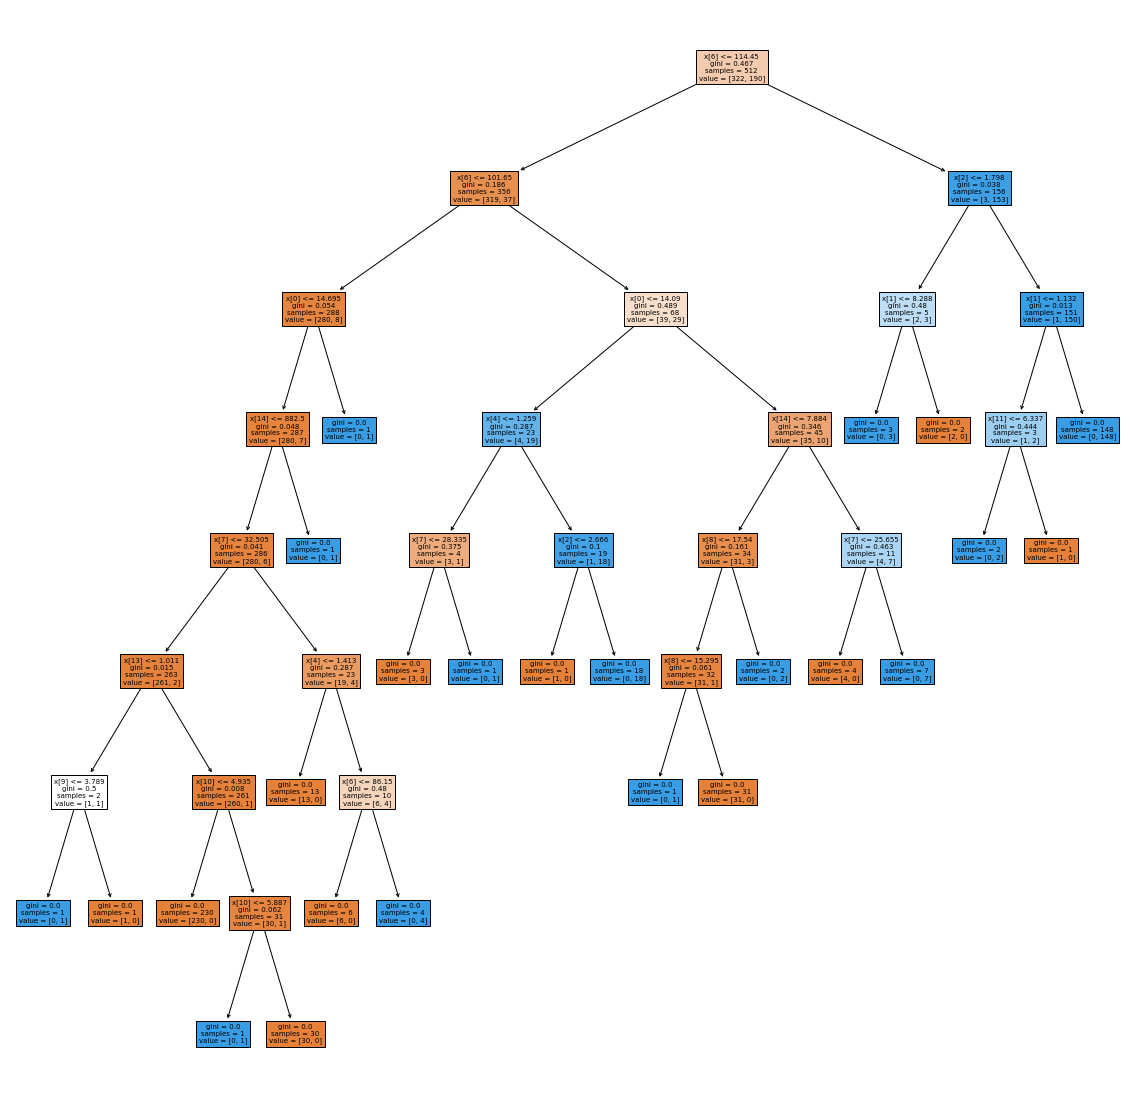

In [56]:
# Optionally print the decision tree

# change plot size

plt.figure(figsize=(20, 20))

# in this case, a "filled" argument is used.
# This way, the features displayed on the tree, will be separated and displayed.

tree.plot_tree(dtc_train, filled=True)

# plot

plt.show()

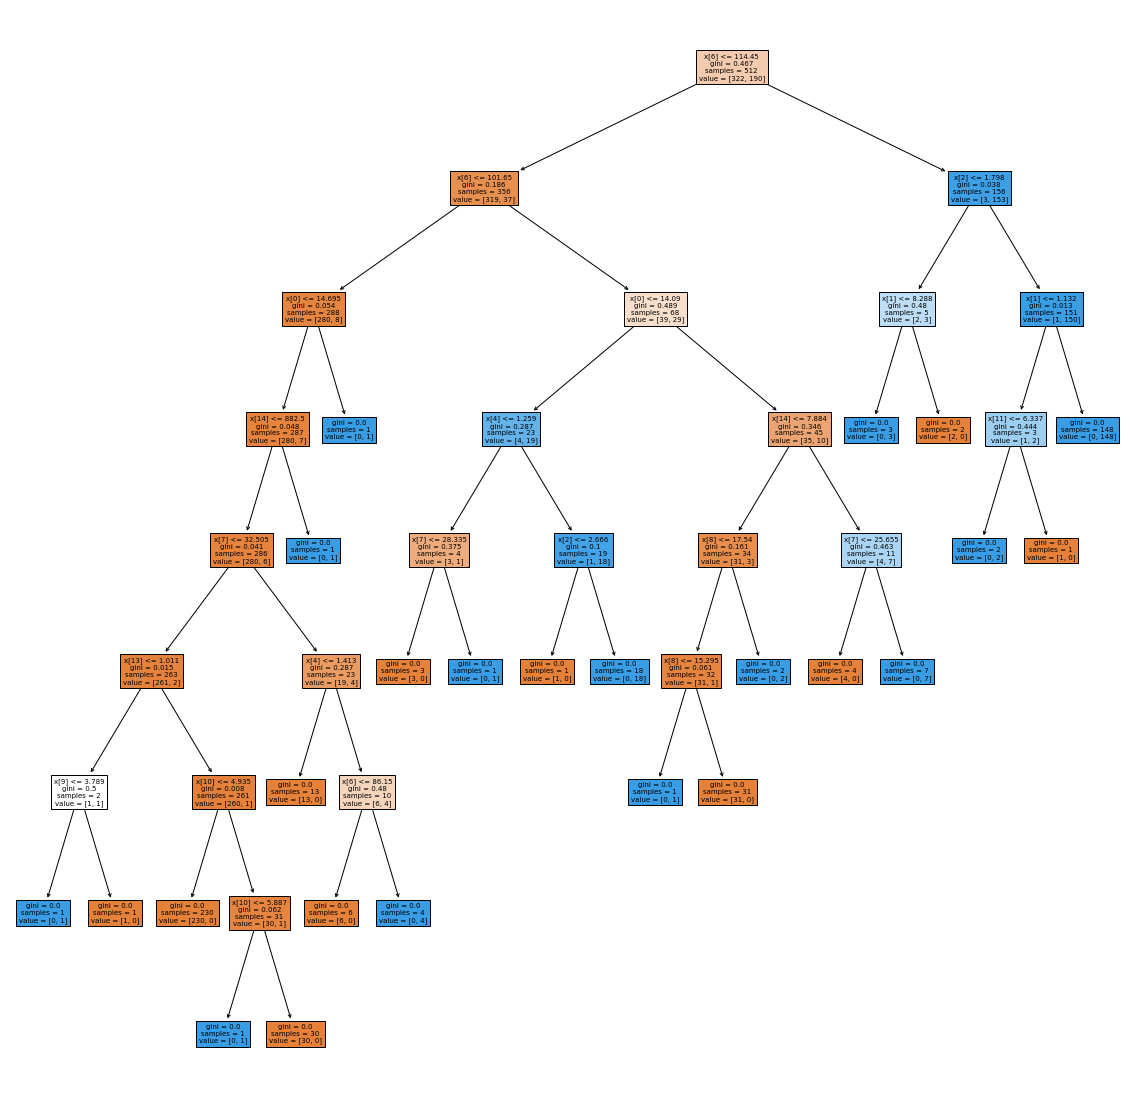

In [57]:
# Optionally print the decision tree

# change plot size

plt.figure(figsize=(20, 20))

# in this case, a "filled" argument is used.
# This way, the features displayed on the tree, will be separated and displayed.

tree.plot_tree(dtc1, filled=True)

# plot

plt.show()

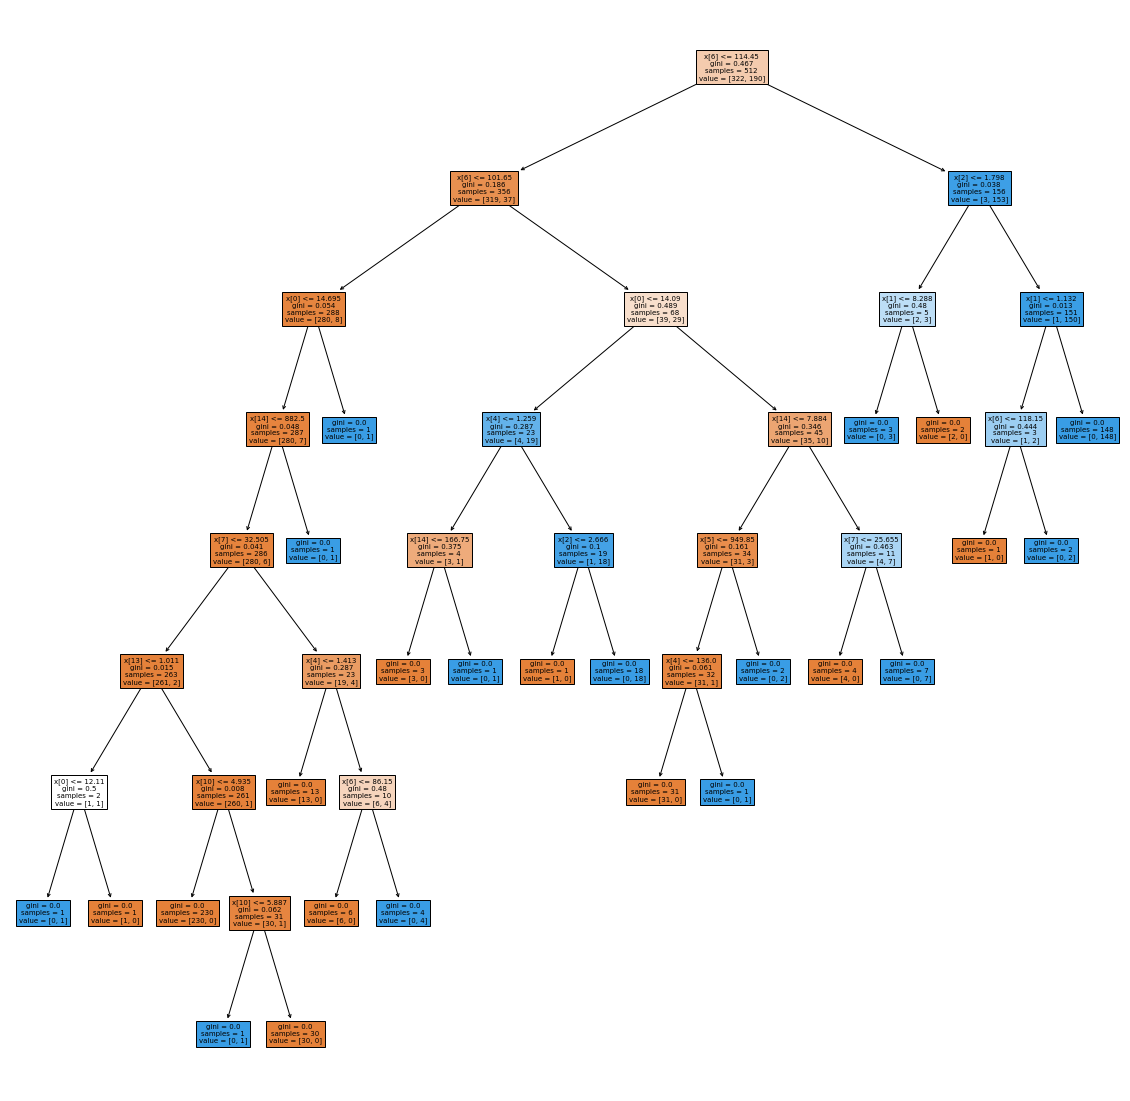

In [58]:
# Optionally print the decision tree

# change plot size

plt.figure(figsize=(20, 20))

# in this case, a "filled" argument is used.
# This way, the features displayed on the tree, will be separated and displayed.

tree.plot_tree(dtc2, filled=True)

# plot

plt.show()

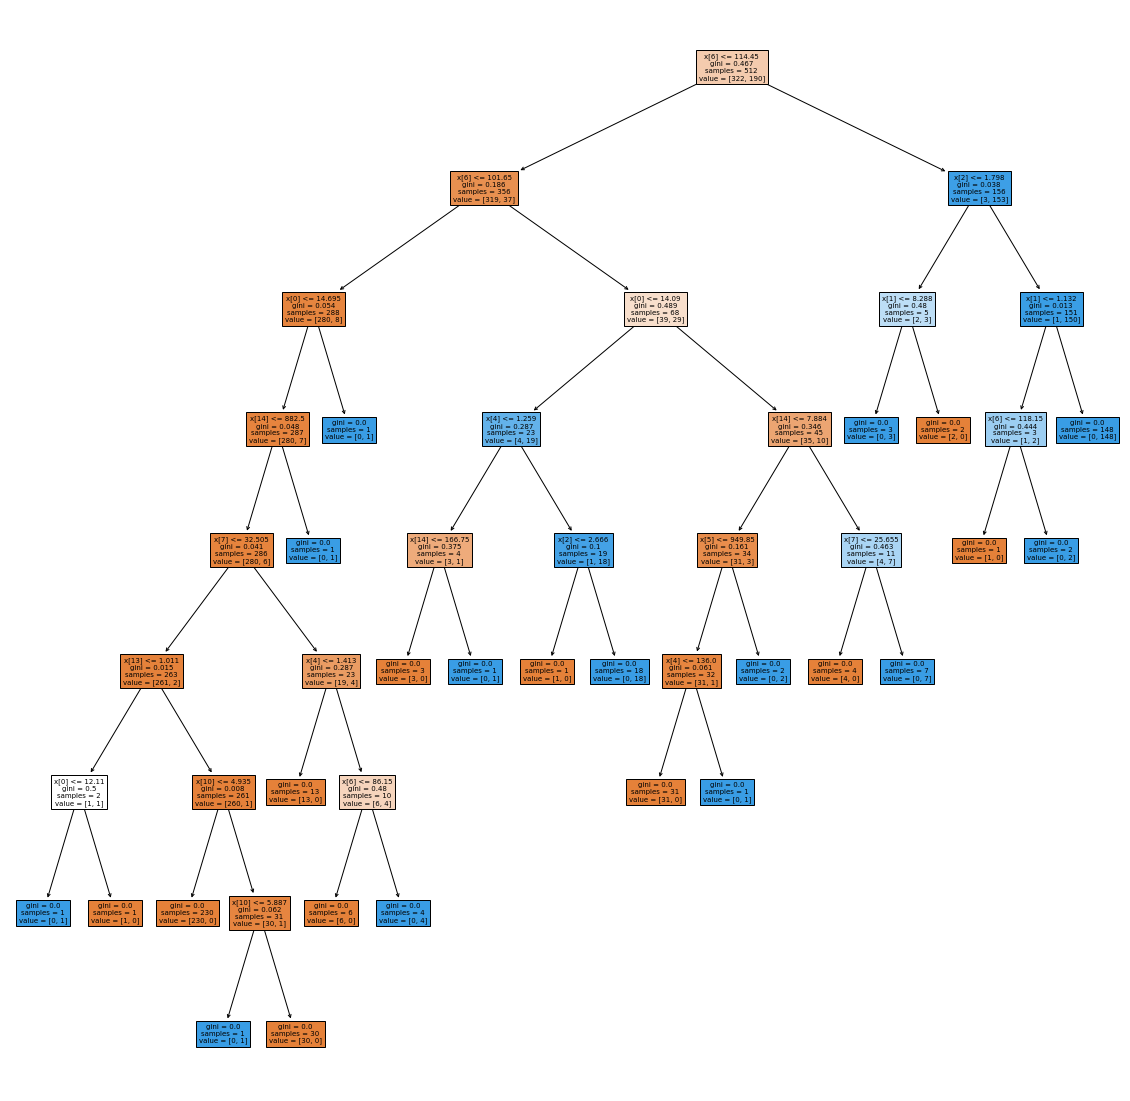

In [59]:
# Optionally print the decision tree

# change plot size

plt.figure(figsize=(20, 20))

# in this case, a "filled" argument is used.
# This way, the features displayed on the tree, will be separated and displayed.

tree.plot_tree(dtc2_train, filled=True)

# plot

plt.show()

In [62]:
# save the pre-trained model

# examine for random forest classifier only

# rf2, which stands for the random forest classifier,
# trained on top of rf1,
# based on the selected features.

rf2_train_filename = 'rf2_train.pkl'
joblib.dump(rf2_train, rf2_train_filename)

['rf2_train.pkl']

In [63]:
# load the model

# examining rf2
rf2_train_loaded = joblib.load('rf2_train.pkl')